# <center> **EE - 451 Image Analysis and Pattern recognition** </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Coin Challenge</center>
<center>Vincent Roduit, Filippo Quadri</center>

---

In [3]:
# Import all the necessary libraries
import os
import numpy as np
import torch
import importlib
import skimage as sk
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from typing import Callable
import cv2 as cv
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects

In [4]:
# Import our own modules
from coin import *

%load_ext autoreload
%autoreload 2

# Load the Images

In [6]:
img = cv.imread('../project/data/train/1. neutral_bg/L1010308.JPG')
# img = cv.imread('../data/train/1. neutral_bg/L1010308.JPG')
# img = cv.imread('../data/train/2. noisy_bg/L1010328.JPG')
img = cv.resize(img, (0,0), fx=0.25, fy=0.25)

imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

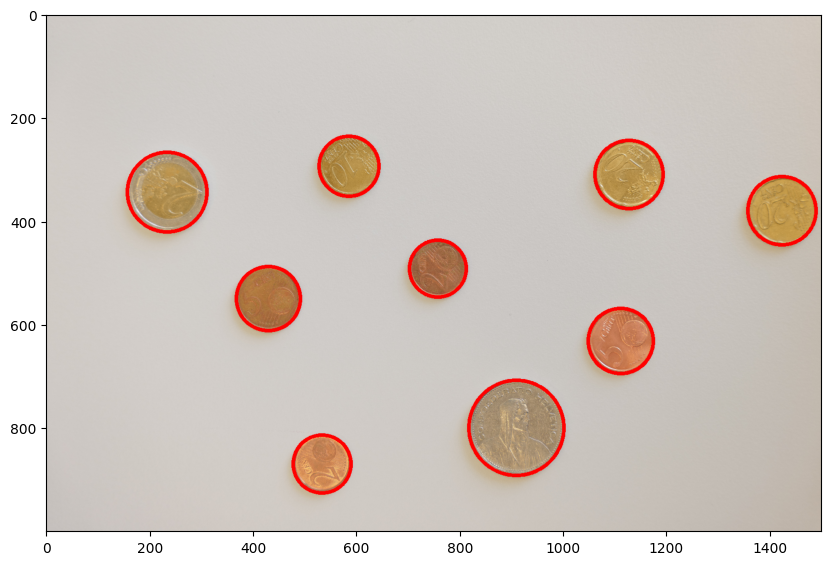

In [15]:
img_det, circles = detect_coin(imgRGB, 30, 100, 31)
plt.figure(figsize=(10, 10))
plt.imshow(img_det, cmap='gray')
plt.show()

In [17]:
x1 = circles[0][0] - circles[0][2]
x2 = circles[0][0] + circles[0][2]
y1 = circles[0][1] - circles[0][2]
y2 = circles[0][1] + circles[0][2]
img_crop = imgRGB[y1:y2, x1:x2]

In [28]:
import cv2
import numpy as np


In [29]:
circles

array([[ 910,  800,   92],
       [ 758,  492,   55],
       [1112,  632,   63],
       [ 534,  870,   56],
       [1128,  310,   66],
       [ 234,  344,   77],
       [ 430,  550,   62],
       [1424,  380,   66],
       [ 586,  294,   58]], dtype=uint16)

In [42]:
center_coordinates = circles[:,:2]
radius = circles[:,2]

In [46]:
def detour_coins(img, circles):
    all_center_coordinates = circles[:,:2]
    all_radius = circles[:,2]

    mask = np.zeros_like(img)

    # Draw a filled white circle in the mask
    for center_coordinates, radius in zip(all_center_coordinates, all_radius):
        center_coordinates = tuple(map(int, center_coordinates))
        radius = int(radius)
        cv2.circle(mask, center_coordinates, radius, (255,255,255), thickness=-1)

    # Convert the mask to boolean
    mask = mask.astype(bool)

    img_black = np.zeros_like(img)

    # Copy the original image to the black image using the mask
    np.copyto(img_black, img, where=mask)

    return img_black

In [52]:
def crop_coins(img, circles):
    all_center_coordinates = circles[:,:2]
    all_radius = circles[:,2]

    img_crops = []

    for center_coordinates, radius in zip(all_center_coordinates, all_radius):
        x1 = center_coordinates[0] - radius
        x2 = center_coordinates[0] + radius
        y1 = center_coordinates[1] - radius
        y2 = center_coordinates[1] + radius
        img_crop = img[y1:y2, x1:x2]
        img_crops.append(img_crop)

    return img_crops

In [50]:
black_img = detour_coins(imgRGB, circles)

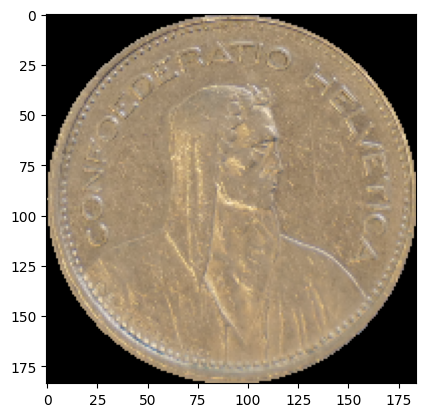

In [51]:
plt.imshow(crop_coins(black_img, circles)[0])

In [ ]:
# Create a multiple slider to adjust the parameters of the detect_coin function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(thresh, min_rad, max_rad):
    img_det = detect_coin(imgRGB, thresh, min_rad, max_rad)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_det, cmap='gray')
    plt.show()

interact(f, thresh=widgets.IntSlider(min=0, max=255, step=1, value=30), min_rad=widgets.IntSlider(min=0, max=255, step=1, value=100), max_rad=widgets.IntSlider(min=0, max=255, step=1, value=31))

# thresh = 49
# min_rad = 100
# max_rad = 31

interactive(children=(IntSlider(value=30, description='thresh', max=255), IntSlider(value=100, description='mi…

<function __main__.f(thresh, min_rad, max_rad)>